In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


- make_classification함수 - 설정에 따른 분류용 가상 데이터를 생성하는 명령 인수
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드
- 반환값:
 - X : [n_samples, n_features] 크기의 배열. 독립 변수
 - y : [n_samples] 크기의 배열. 종속 변수


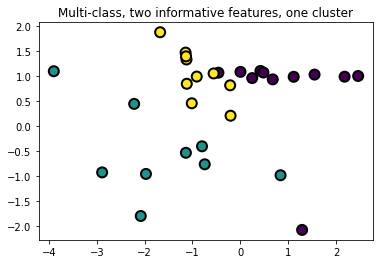

In [3]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_samples=30,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1,
                           n_classes=3,
                           random_state=123) 

# c:y에서 c는 컬러로 각데이터에 대해 y배열(리스트)를 사용
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2) 
plt.show()


In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random") # 모형 생성. 클러스터 = 3, k-means++ 
model.fit(X)


KMeans(init='random', n_clusters=3)

In [5]:
model.cluster_centers_ # 각 클러스터의 중심값


array([[-1.96728067, -0.48772003],
       [-0.63433935,  1.03897373],
       [ 1.32532665,  0.36128304]])

In [6]:
pred = model.predict(X) # 데이터가 속하는 클러스터 예측
pred


array([2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 1])

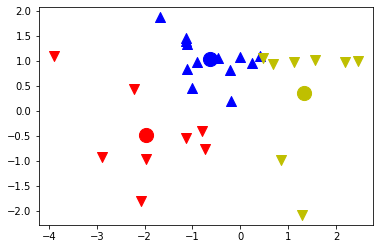

In [7]:
# 모델을 이용해 클러스터링 된 결과를 산점도를 이용해 표시
c0, c1, c2 = model.cluster_centers_ # 각 클러스터의 중심값(평균값?).클러스터 수만큼 구해짐
# 첫번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker="v", c="r") 
# 두번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100,marker="^", c="b") 
# 세번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100,marker="v", c="y") 
plt.scatter(c0[0], c0[1], s=200, c="r") # 첫번째 클러스터의 중심값
plt.scatter(c1[0], c1[1], s=200, c="b") # 두번째 클러스터의 중심값
plt.scatter(c2[0], c2[1], s=200, c="y") # 세번째 클러스터의 중심값
plt.show()


In [11]:
# 거리 계산 예
import numpy as np

x = np.random.randint(low=1, high=10, size=(3,3))
print(x)
print('-----------------')
L1_norm = np.linalg.norm(x, axis=1, ord=1) # ord=1은 L1 norm
print(L1_norm)
print("shape: ", L1_norm.shape)
print('-----------------')
L2_norm = np.linalg.norm(x, axis=1, ord=2) # ord=2은 L2 norm default.
print(L2_norm)
print("shape: ", L2_norm.shape)
print('-----------------')

[[8 4 2]
 [8 6 1]
 [2 2 5]]
-----------------
[14. 15.  9.]
shape:  (3,)
-----------------
[ 9.16515139 10.04987562  5.74456265]
shape:  (3,)
-----------------


In [8]:
# X 데이터와 중심점사이의 거리를 측정한 값, 
# 그리고 클러스터링을 통해 할당된 레이블을 하나의 데이터프레임으로 만들어 출력
import pandas as pd
import numpy as np
df = pd.DataFrame(np.hstack([X, np.linalg.norm(X - c0, axis=1)[:, np.newaxis], # 첫번째 클러스터 중심값과의 거리
                             np.linalg.norm(X - c1, axis=1)[:, np.newaxis], # 두번째 클러스터 중심값과의 거리
                             np.linalg.norm(X - c2, axis=1)[:, np.newaxis], # 세번째 클러스터 중심값과의 거리
                             model.labels_[:, np.newaxis]]),
                  columns=["x0", "x1", "d0", "d1", "d2", "class"])
df

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,3.628258,3.668319,2.444788,2.0
1,0.677549,0.926385,2.999136,1.316711,0.859625,2.0
2,0.248341,0.952078,2.642347,0.886947,1.228388,1.0
3,-2.218453,0.436127,0.957383,1.694945,3.544570,0.0
4,-3.898155,1.089007,2.492858,3.264199,5.273930,0.0
5,-2.080478,-1.805009,1.322144,3.190542,4.036376,0.0
6,1.115515,0.977966,3.413483,1.750918,0.651398,2.0
7,-0.203825,0.199599,1.892666,0.943341,1.537676,1.0
8,0.420718,1.095145,2.864960,1.056551,1.164848,1.0
9,-0.457603,1.059832,2.161954,0.177963,1.914892,1.0


In [12]:
# 모델과 데이터를 인수로 받아 산점도와 중심점을 출력할 함수
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=20, marker="v", c="r")
    plt.scatter(data[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=20, marker="^", c="b")
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100,marker="v", c="y")
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.scatter(c2[0], c2[1], s=200, c="y")


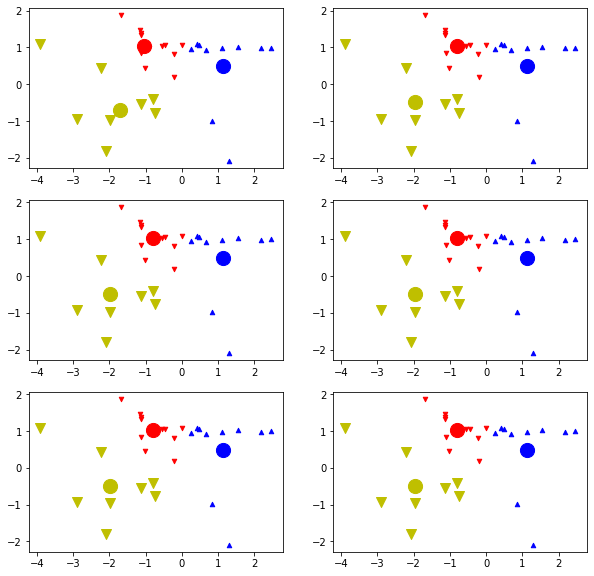

In [13]:
# KMeans 클래스의 max_iter 인자는 최대 학습 횟수를 지정
plt.figure(figsize=(10,10))
model1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_clusters(model1, X)

model2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_clusters(model2, X)

model3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_clusters(model3, X)

model4 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_clusters(model4, X)

model5 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_clusters(model5, X)

model6 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_clusters(model6, X)
plt.show()


# K-Means Clustering  (iris)

In [14]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


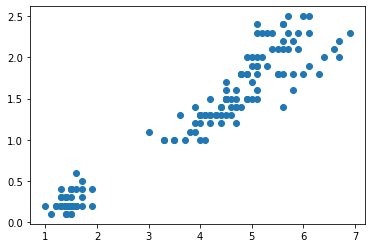

In [15]:
# 'petal length' 와 'petal width' 데이터 2개의 상관 관계
import matplotlib.pyplot as plt

petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()


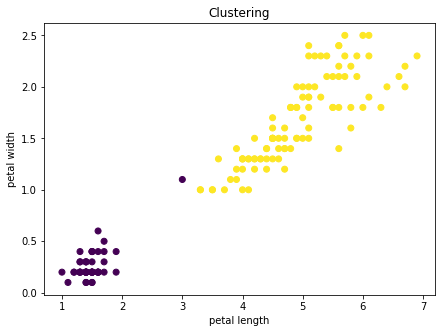

In [16]:
# K=2로 Clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:, 2:4])

y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
plt.figure(figsize=(7, 5))
plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred)
plt.title('Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


In [17]:
km.predict(iris_data_pd.iloc[:, 2:4])
print(iris_data_pd.iloc[98, 2:4])

# 각 클러스터 기준값 확인
km.cluster_centers_


petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [18]:
# 유클리드 거리 측정
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared)
    return result 


In [19]:
print('0 cluster distance : ', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], 
      km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print('1 cluster distance : ', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], 
      km.cluster_centers_[1][0], km.cluster_centers_[1][1]))


0 cluster distance :  1.7246990164733285
1 cluster distance :  2.0112458036464465
